## Introduction

In this project, we will explore a dataset focused on the treatment costs of various patients. The cost of treatment is influenced by several factors, such as age, type of clinic, location, and more, though information regarding patient diagnoses is unavailable. Despite the dataset being relatively small, the goal is to demonstrate effective methods for uncovering insights and patterns that reveal the underlying factors affecting patient charges.

The primary objective is to develop a regression model that can approximate patient treatment costs. To achieve this, we will conduct a thorough analysis of the available data to identify key factors influencing the charges. By systematically exploring the dataset and identifying patterns, we aim to gain a deeper understanding of the variables that most significantly impact treatment costs. Ultimately, this approach will enhance the model's accuracy in predicting patient charges.

## import important libraries  

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

#It has all the probability distributions available along with many statistical functions.
import scipy.stats as stats
from scipy.stats import skew

#regression models
from sklearn.linear_model import LinearRegression, Ridge
#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 

## Reading and understand the data

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
insured = data.copy()

In [6]:
insured.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insured.sample()

,age,sex,bmi,children,smoker,region,charges
931,39,female,32.5,1,no,southwest,6238.298


In [9]:
insured.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
insured.shape

(1338, 7)

In [13]:
insured.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
insured.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [11]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Types of variables

Categorical varibles - sex,smoker,region,children

Quantitative variables -age,bmi,charges. Here children is a discrete variable where as age, bmi, and charges are continous variables.

There are no missing values

In [15]:
# changing object dtype to category to save memory

In [17]:
insured.sex = insured['sex'].astype("category")
insured.smoker = insured['smoker'].astype('category')
insured.region=insured['region'].astype("category")

In [19]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


### Mathematical Description

In [20]:
insured.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Observations

Average age of the primary beneficiary is 39.2 and maximum age is 64.

Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13

Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770

Median is less than mean in charges , indicating distrubution is postively skewed .

Customer on an average has 1 child.

For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted

In [21]:
insured.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [25]:
# duplicated data
insured[insured.duplicated()].shape

(1, 7)

In [26]:
insured = insured.drop_duplicates()

In [28]:
insured.shape

(1337, 7)

In [30]:
categorical_cols = insured.select_dtypes(include=['category'])

# Iterate over categorical columns and print value counts
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(insured[col].value_counts())
    print("\n")

Value counts for sex:
sex
male      675
female    662
Name: count, dtype: int64


Value counts for smoker:
smoker
no     1063
yes     274
Name: count, dtype: int64


Value counts for region:
region
southeast    364
southwest    325
northeast    324
northwest    324
Name: count, dtype: int64




In [33]:
# Apply value_counts() to each column
for col in insured.columns:
    print(f"Value counts for {col}:")
    print(insured[col].value_counts().head(20))
    print("\n")

Value counts for age:
age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
Name: count, dtype: int64


Value counts for sex:
sex
male      675
female    662
Name: count, dtype: int64


Value counts for bmi:
bmi
32.300    13
28.310     9
30.800     8
31.350     8
28.880     8
34.100     8
30.875     8
30.495     8
34.800     7
24.320     7
38.060     7
25.460     7
27.645     7
25.800     7
35.200     7
33.330     7
32.110     7
27.360     7
32.775     7
19.950     6
Name: count, dtype: int64


Value counts for children:
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


Value counts for smoker:
smoker
no     1063
yes     274
Name: count, dtype: int64


Value counts for region:
region
southeast    364
southwest    325
northeast    324
northwest    324
Name: count, dtype: int64


Value counts for charges:
charges
16884.

#### Observations

676 male and 662 female, indicated sample has slightly more males than females.

1064 nonsomker and 274 smoker, indicating sample has more nonsmokers.

Number of claims from customer who reside in southwest region is more compared to other regions

In [34]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


### Data Exploration

### Handling Outliers

In [38]:
# Function to detect outliers using IQR
def detect_outliers_iqr(insured):
    outliers = {}
    
    # Loop through numerical columns only
    for col in insured.select_dtypes(include=['float64', 'int64']):
        Q1 = insured[col].quantile(0.25)  # 25th percentile
        Q3 = insured[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers[col] = insured[(insured[col] < lower_bound) | (insured[col] > upper_bound)]
        
        print(f"Outliers in {col}:")
        print(outliers[col])
        print("\n")
    
    return outliers

# Example usage with your DataFrame
outliers = detect_outliers_iqr(insured)

Outliers in age:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


Outliers in bmi:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


Outliers in children:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


Outliers in charges:
      age     sex     bmi  children smoker     region      charges
14     27    male 

#### Age col outliers

In [57]:
col_name = 'age'  # Replace with your actual column name

def detect_outliers_iqr(df, col_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
    
    return outliers

# Call the function and print outliers
outliers = detect_outliers_iqr(insured, col_name)

if not outliers.empty:
    print(f"Outliers in '{col_name}':")
    print(outliers)
else:
    print(f"No outliers found in '{col_name}'.")

No outliers found in 'age'.


In [42]:
print(lower_bound)
print(upper_bound)

-9.0
87.0


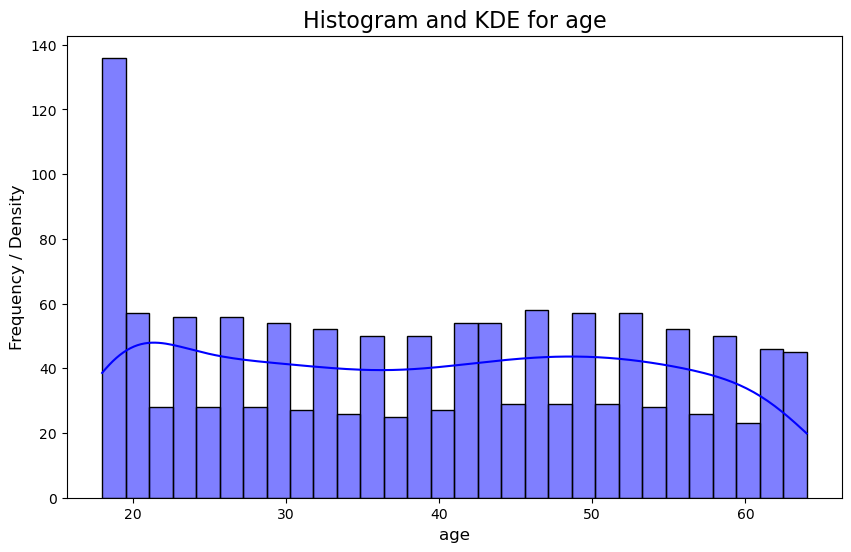

In [41]:
col_name = 'age'  # Replace with your actual column name

# Plotting both Histogram and KDE together
plt.figure(figsize=(10, 6))
sns.histplot(insured[col_name], kde=True, bins=30, color='blue')

# Add titles and labels
plt.title(f"Histogram and KDE for {col_name}", fontsize=16)
plt.xlabel(col_name, fontsize=12)
plt.ylabel('Frequency / Density', fontsize=12)

# Show the plot
plt.show()

In [46]:
insured['age'].unique().max()

64

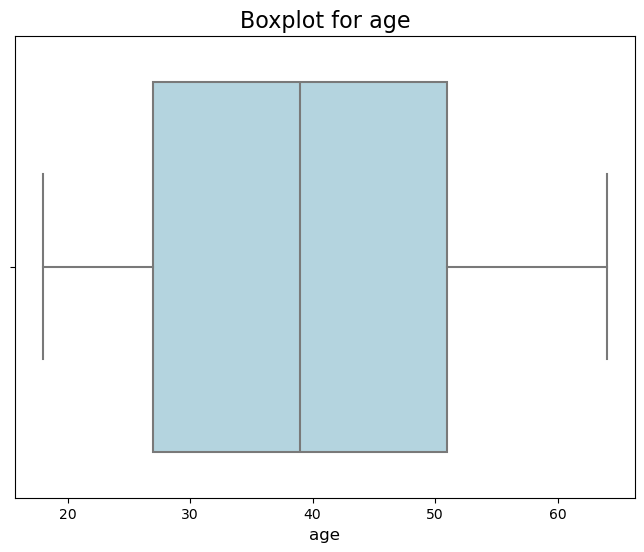

In [47]:
col_name = 'age'  # Replace with your actual column name

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=insured[col_name], color='lightblue')

# Add titles and labels
plt.title(f"Boxplot for {col_name}", fontsize=16)
plt.xlabel(col_name, fontsize=12)

# Show the plot
plt.show()

In [58]:
skewness = insured[col_name].skew()

print(f"Skewness of '{col_name}': {skewness}")

Skewness of 'age': 0.054780773126998195


### BMI col outlier

In [53]:
col_name = 'bmi'
def detect_outliers_iqr(df, col_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
    
    return outliers

# Call the function and print outliers
outliers = detect_outliers_iqr(insured, col_name)

if not outliers.empty:
    print(f"Outliers in '{col_name}':")
    print(outliers)
    print(outliers.shape)
else:
    print(f"No outliers found in '{col_name}'.")


Outliers in 'bmi':
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270
(9, 7)


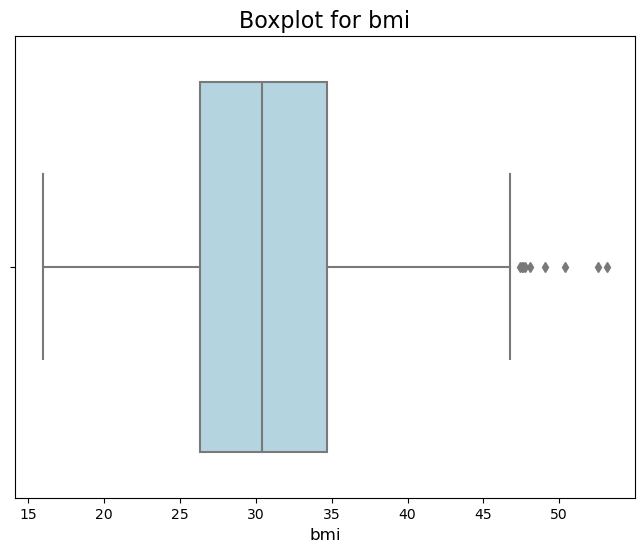

In [49]:
col_name = 'bmi'  # Replace with your actual column name

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=insured[col_name], color='lightblue')

# Add titles and labels
plt.title(f"Boxplot for {col_name}", fontsize=16)
plt.xlabel(col_name, fontsize=12)

# Show the plot
plt.show()

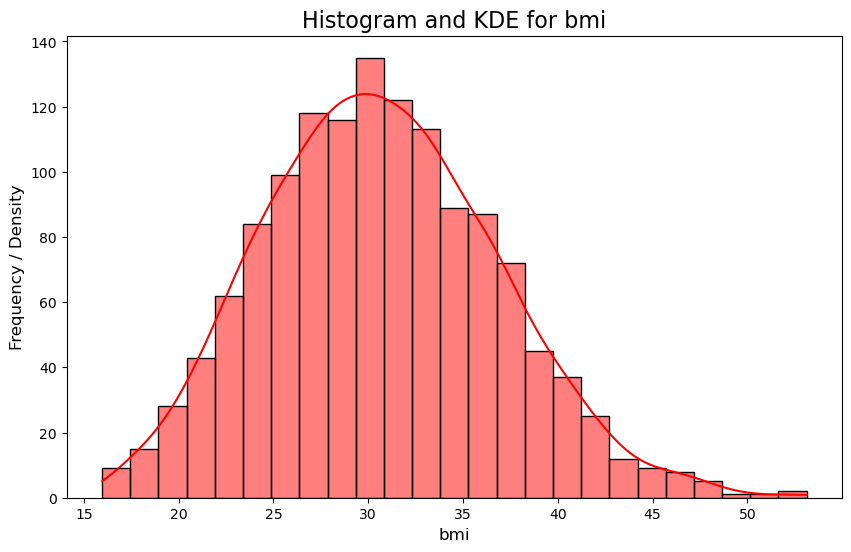

In [55]:
col_name = 'bmi'

plt.figure(figsize=(10,6))
sns.histplot(insured[col_name], kde = True, bins= 25, color = 'red')

plt.title(f"Histogram and KDE for {col_name}", fontsize = 16)
plt.xlabel(col_name, fontsize=12)
plt.ylabel('Frequency / Density', fontsize=12)

# Show the plot
plt.show()

In [56]:
skewness = insured[col_name].skew()

print(f"Skewness of '{col_name}': {skewness}")

Skewness of 'bmi': 0.28391419385321137


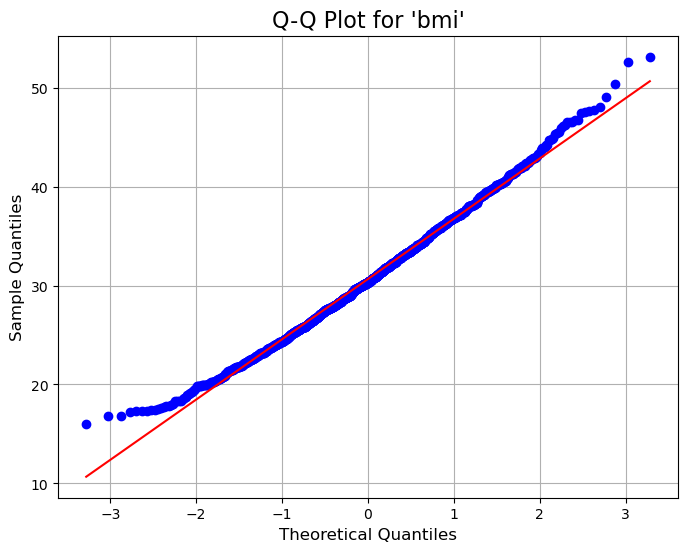

In [59]:
col_name = 'bmi'

# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(insured[col_name], dist="norm", plot=plt)

# Add title and labels
plt.title(f"Q-Q Plot for '{col_name}'", fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)

# Show the plot
plt.grid()
plt.show()

In [61]:
insured.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [62]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


### Childern col outliers

In [70]:
col_name = 'children'

In [71]:
# Call the function and print outliers
outliers = detect_outliers_iqr(insured, col_name)

if not outliers.empty:
    print(f"Outliers in '{col_name}':")
    print(outliers)
    print(outliers.shape)
else:
    print(f"No outliers found in '{col_name}'.")

No outliers found in 'children'.


In [72]:
skewness_chlidren = insured[col_name].skew()
print(f"Skewness of '{col_name}': {skewness}")

Skewness of 'children': 0.054780773126998195


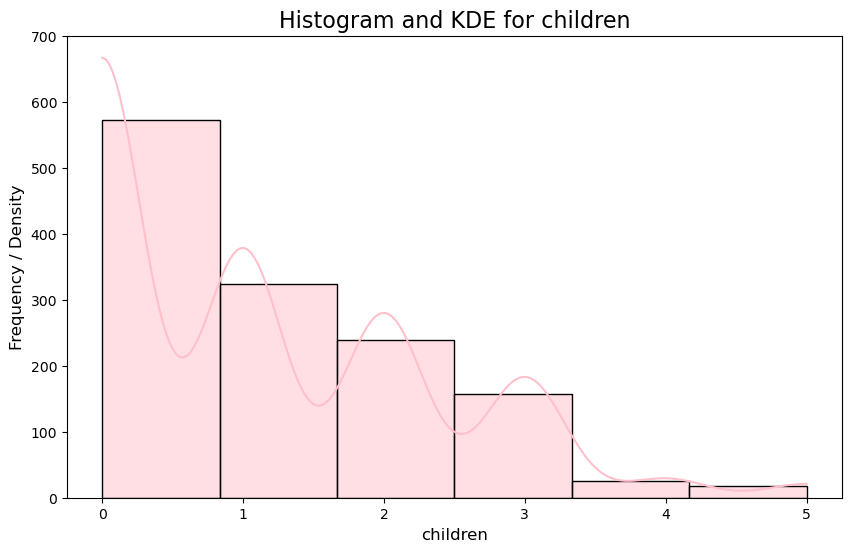

In [84]:
col_name = 'children'  # Replace with 'children' for your specific case

# Plotting the histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(insured[col_name], kde=True, bins=6, color='pink')  # Set 'children' as the column

# Add titles and labels
plt.title(f"Histogram and KDE for {col_name}", fontsize=16)
plt.xlabel(col_name, fontsize=12)
plt.ylabel('Frequency / Density', fontsize=12)

# Show the plot
plt.show()

In [77]:
insured['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

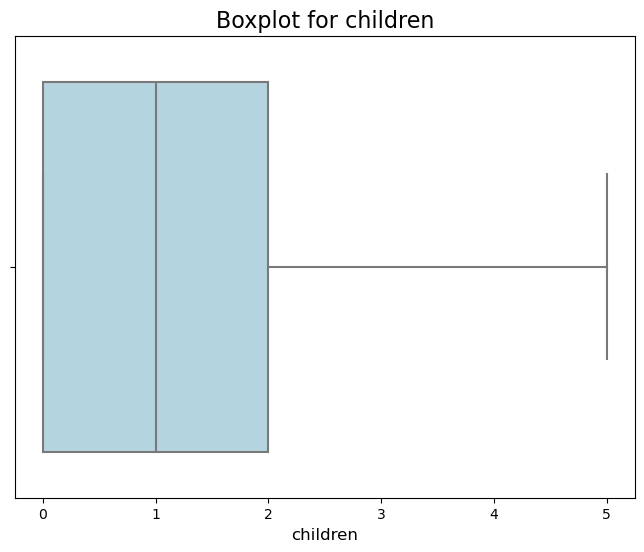

In [79]:

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=insured[col_name], color='lightblue')

# Add titles and labels
plt.title(f"Boxplot for {col_name}", fontsize=16)
plt.xlabel(col_name, fontsize=12)

# Show the plot
plt.show()

### Charges outliers

In [85]:
col_name = 'charges'

In [86]:
# Call the function and print outliers
outliers = detect_outliers_iqr(insured, col_name)

if not outliers.empty:
    print(f"Outliers in '{col_name}':")
    print(outliers)
    print(outliers.shape)
else:
    print(f"No outliers found in '{col_name}'.")

Outliers in 'charges':
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]
(139, 7)


In [88]:
skewness_charges = insured[col_name].skew() 
skewness_charges

1.5153909108403483

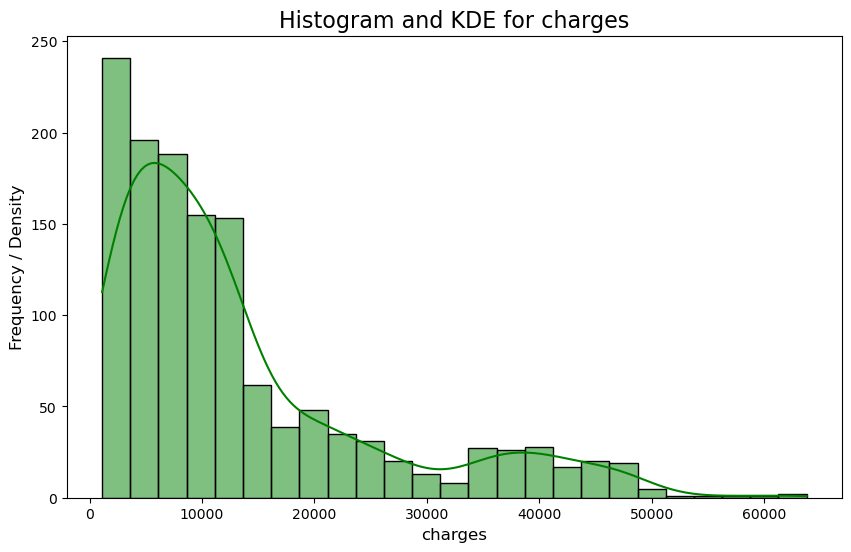

In [89]:
# Plotting the histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(insured[col_name], kde=True, bins=25, color='green')  # Set 'children' as the column

# Add titles and labels
plt.title(f"Histogram and KDE for {col_name}", fontsize=16)
plt.xlabel(col_name, fontsize=12)
plt.ylabel('Frequency / Density', fontsize=12)

# Show the plot
plt.show()

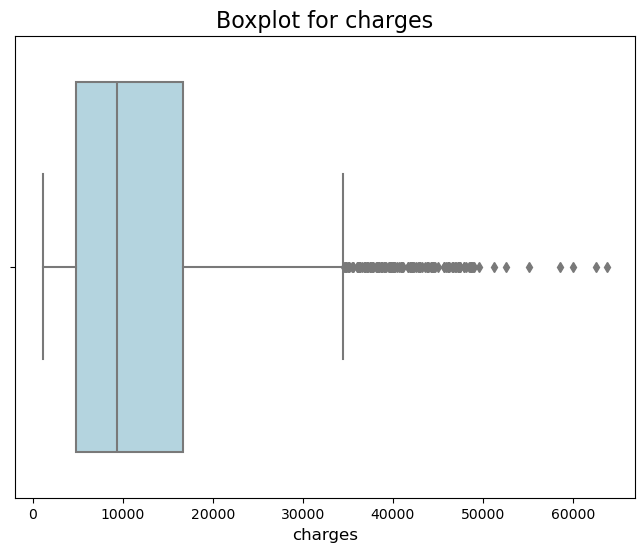

In [90]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=insured[col_name], color='lightblue')

# Add titles and labels
plt.title(f"Boxplot for {col_name}", fontsize=16)
plt.xlabel(col_name, fontsize=12)

# Show the plot
plt.show()

### Observations

Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.
Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end
Most of the beneficary have no childrens.
Charges distrubution is unimodal and is right skewed .Average cost incured to the insurance is appro. 130000 and highest charge is 63770.There are lot of outliers at upper end.

##  Univariate Analysis

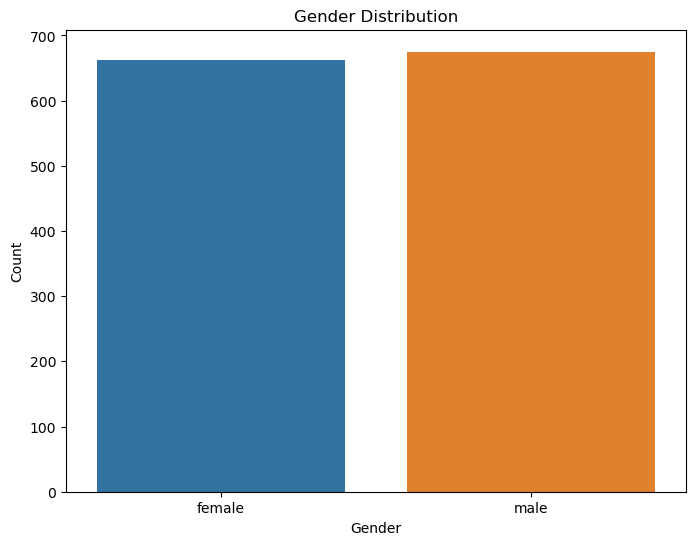

In [91]:
# Visualization : Bar plot of gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=insured, x='sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

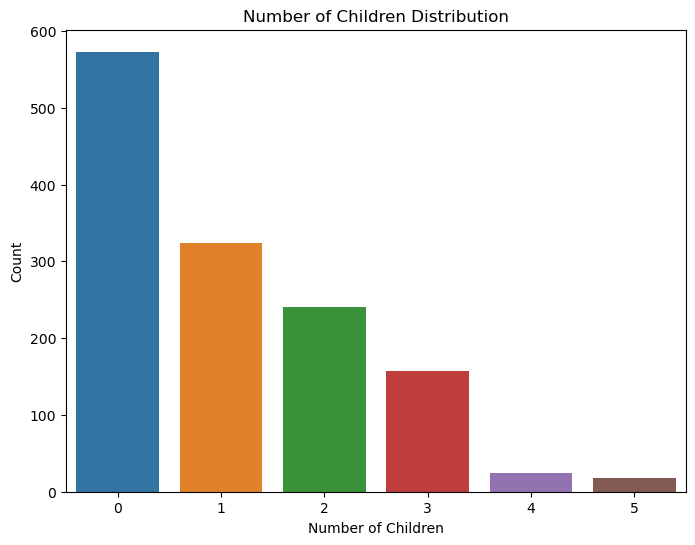

In [92]:
# Visualization : Bar plot of the number of children/dependents
plt.figure(figsize=(8, 6))
sns.countplot(data=insured, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()

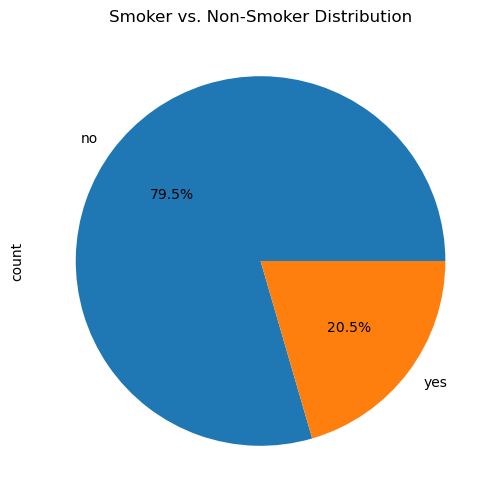

In [93]:
# Visualization : Pie chart of smoker vs. non-smoker distribution
plt.figure(figsize=(8, 6))
insured['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

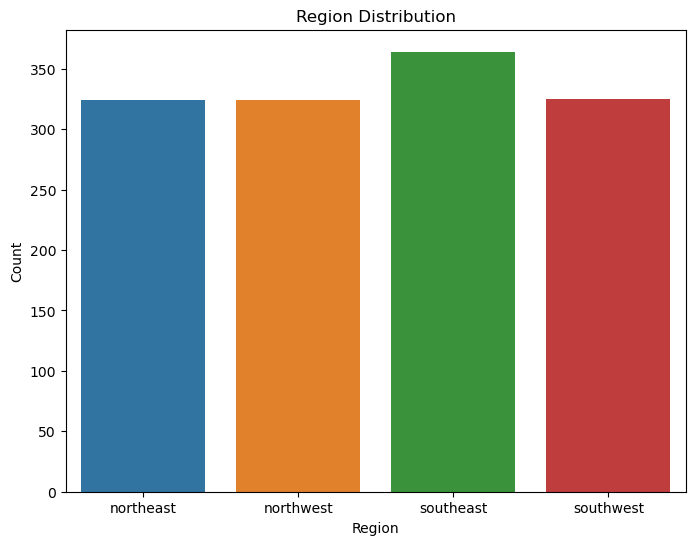

In [94]:
# Visualization : Bar plot of region distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=insured, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

### Observations

50.5% of beneficiary are male and 49.5 % are female. Approximately same number of male and female beneficiary
.
20.5% of beneficary are smoker
s.
Beneficary are evenly distributed across regions with South East being the most populous one (~27%) with the rest of regions each containing around ~
24%
Most of the beneficiary don't have kid.

## Multivariate Analysis

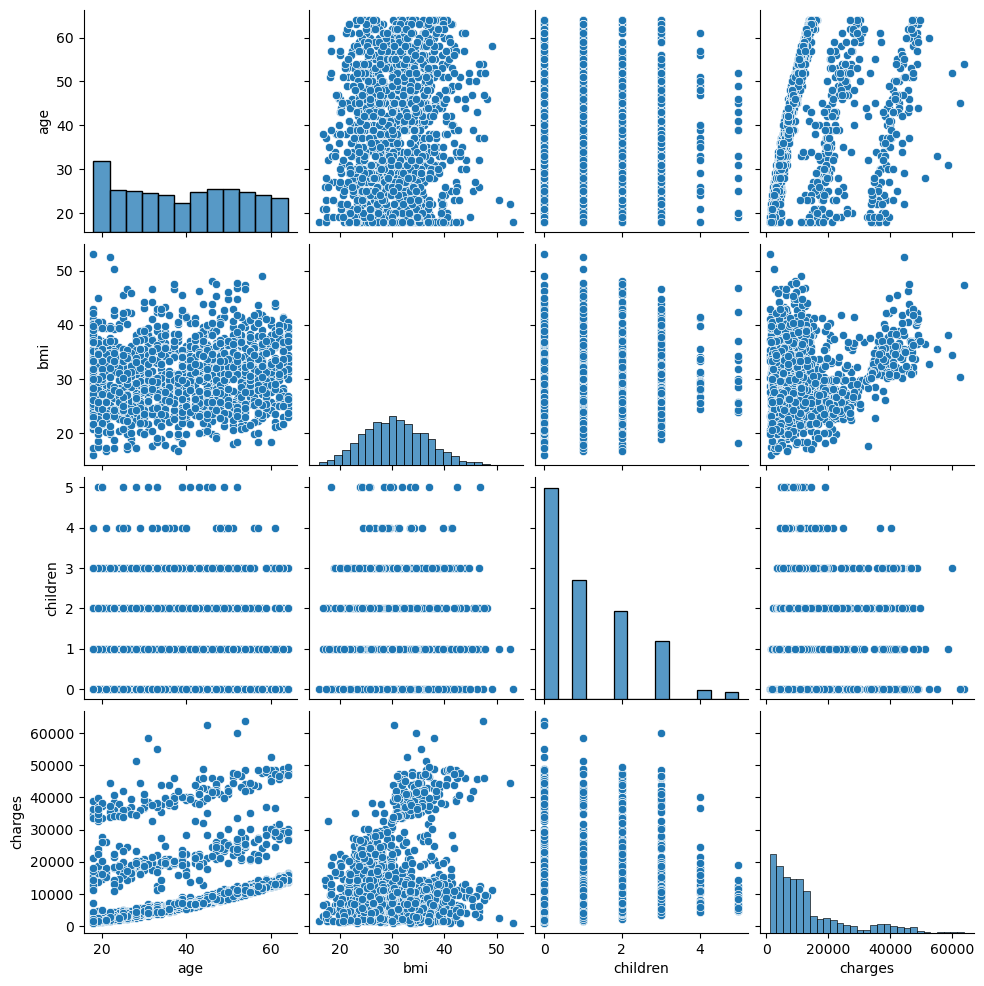

In [95]:
sns.pairplot(insured)

[Text(0.5, 1.0, 'Smoker vs Charges')]

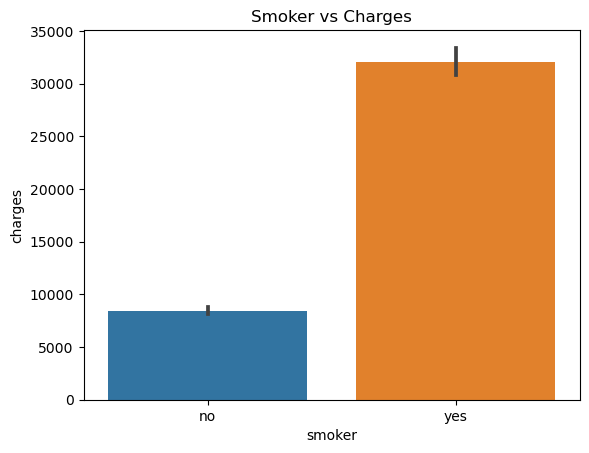

In [97]:
#smoker vs charges
sns.barplot(x=insured.smoker,y=insured.charges).set(title="Smoker vs Charges")

[Text(0.5, 1.0, 'Smoker vs Region')]

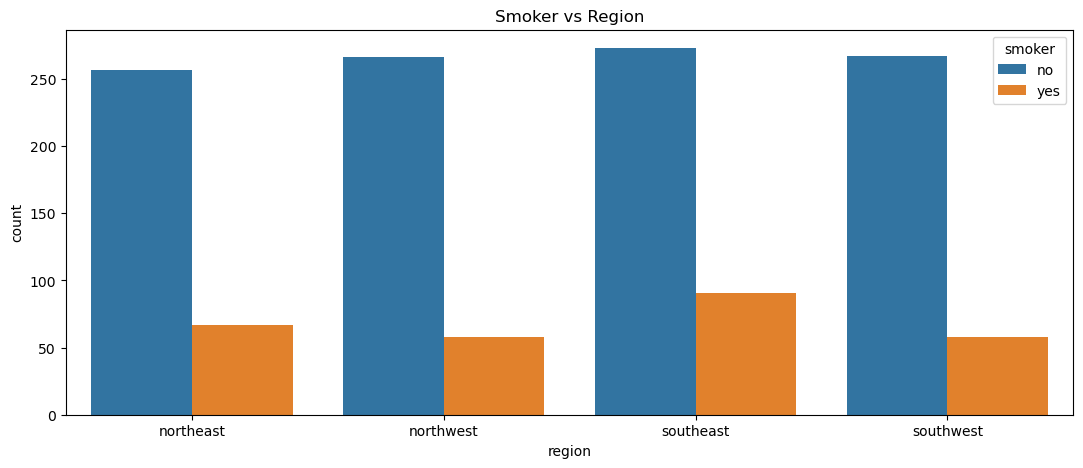

In [99]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
#bar_perc(ax,insured['smoker'])
ax.set(title="Smoker vs Region")

[Text(0.5, 1.0, 'Smoker vs Sex')]

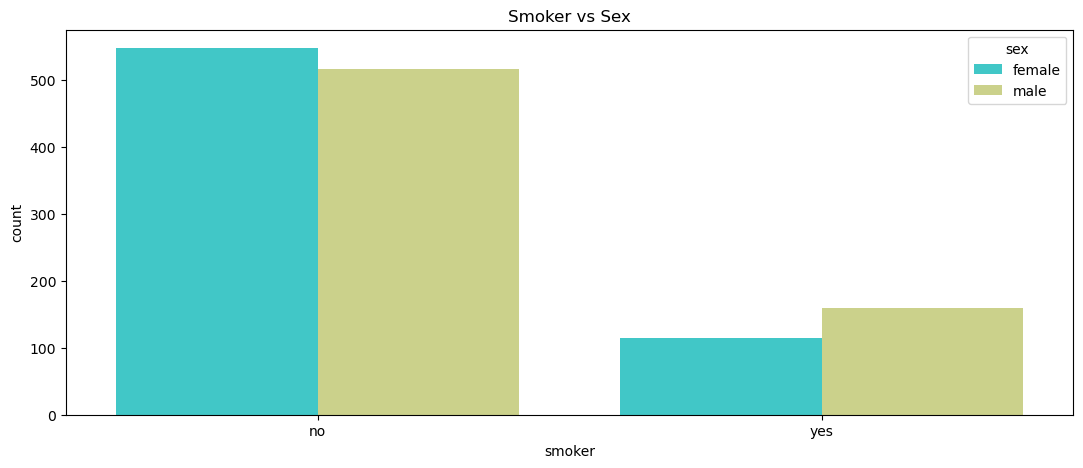

In [101]:
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured,palette='rainbow')
ax.set(title="Smoker vs Sex")

### Observation

There are more male smokers than female.

Southeast region has more smokers

Smoker have more costlier claims than nonsmoker.

In [102]:
pd.crosstab(insured['sex'],insured['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,284,166,121,80,14,10


<Figure size 2500x1000 with 0 Axes>

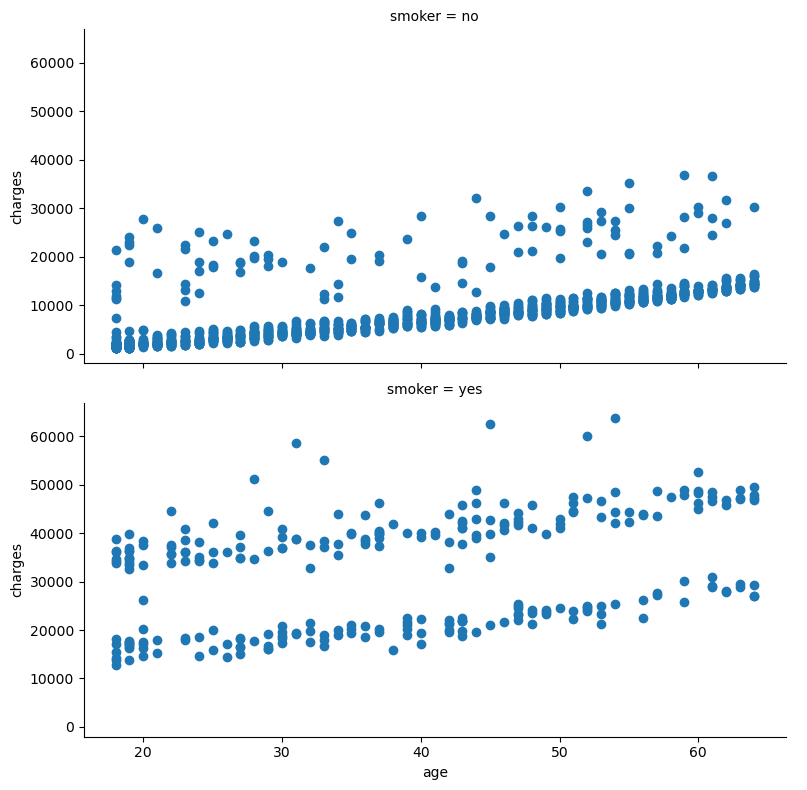

In [103]:
plt.figure(figsize=(25,10))
g=sns.FacetGrid(insured,row='smoker',height=4, aspect=2)
g=(g.map(plt.scatter ,'age','charges').add_legend())

## Categorical Column Analysis

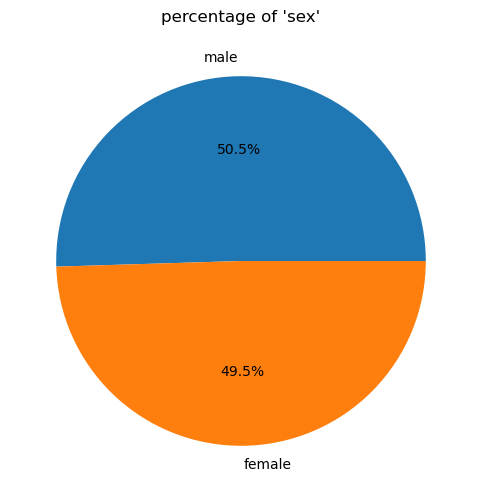

In [107]:
s = insured['sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.title("percentage of 'sex'")
plt.show()

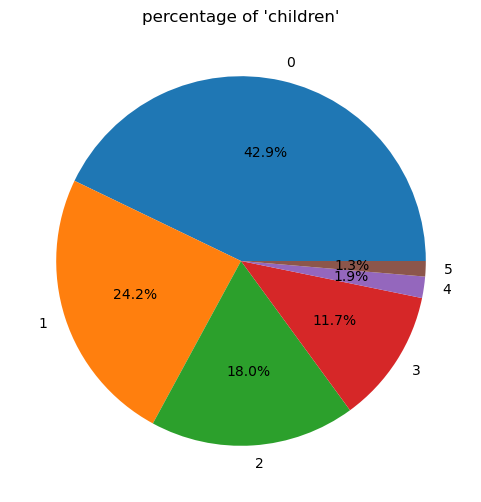

In [108]:
s = insured['children'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.title("percentage of 'children'")
plt.show()

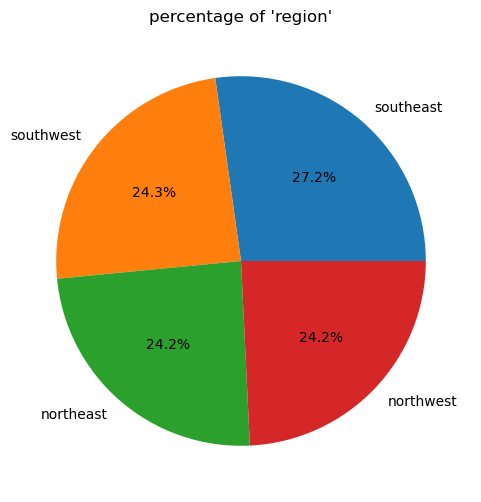

In [109]:
s = insured['region'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.title("percentage of 'region'")
plt.show()

### Observations:

In column 'sex', the number of male clients are more than female clients. (0.5% more)

In column 'children', most people do not have child and only 1.3% of all have 5 children. The charges which families with  5 children got is less than 30000.

In column 'smoker', most clients are not smokers and only 20.5%(less than 300) of all are.

In column 'region', northwest and northeast has the same percentage and southeast has the highest(27.2%).

### Conclusion from EDA

As anticipated, the insurance costs increase with the beneficiary's age.

Males who smoke tend to submit the most claims and incur higher bills. Interestingly, non-smoking females also file more claims than their male counterparts, which may be related to childbirth; further investigation into the types of claims is needed for a clearer understanding.

Beneficiaries with two or three dependents have higher bills compared to those with five dependents, which is unusual and may be influenced by the unequal number of observations in each group. For instance, the group with no dependents has 574 observations, while the group with five dependents only has 18.

Customers with a BMI greater than 30 fall into the higher obesity category, often experiencing more health issues and, consequently, submitting more claims.

Furthermore, females with a BMI exceeding 45 also incur higher insurance costs.

Overall, age, BMI, and smoking are significant factors that can lead to increased costs for the insurance company.








In [110]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


## Statistical Analysis

#### Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

In [112]:
insured.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
insured.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [115]:
# Separate the data into smokers and non-smokers
smokers = insured[insured['smoker'] == 'yes']['charges']
non_smokers = insured[insured['smoker'] == 'no']['charges']

In [116]:
smokers.count()

274

In [117]:
non_smokers.count()

1063

In [118]:
# Check normality (Shapiro-Wilk Test)
shapiro_smokers = stats.shapiro(smokers)
shapiro_non_smokers = stats.shapiro(non_smokers)

In [119]:
print(shapiro_smokers)
print(shapiro_non_smokers)

ShapiroResult(statistic=0.9395526647567749, pvalue=3.6255991542333277e-09)
ShapiroResult(statistic=0.8729138374328613, pvalue=1.503623581761669e-28)


In [120]:
# Check equal variance (Levene's Test)
levene_test = stats.levene(smokers, non_smokers)
print(f"Levene's Test: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")


Levene's Test: Statistic=332.47137394800666, p-value=1.670117565125241e-66


Step 1: Define null and alternative hypothesis
 
H0:μ1<=μ2

The average charges of smokers is less than or equal to nonsmokers
 
Ha:μ1>μ2

The average charges of smokers is greater than nonsmokers

Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
α = 0.05

Step 3: Identify the test
Standard deviation of the population is not known ,will perform a T stat test . The > sign in alternate hypothesis indicate test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of sampling distribution curve.

Step 4: Calculate the test-statistics and p-value

In [125]:
# Perform the one-tailed T-Test
t_test = stats.ttest_ind(smokers, non_smokers, alternative='greater')

# Print the results
print(f"T-Test: Statistic={t_test.statistic}, p-value={t_test.pvalue}")

# Interpret the results
alpha = 0.05  # significance level
if t_test.pvalue < alpha:
    print("Reject the null hypothesis: smokers have greater medical claims than non-smokers.")
else:
    print("Fail to reject the null hypothesis: no evidence that smokers have greater medical claims than non-smokers.")

T-Test: Statistic=46.64479459840305, p-value=7.033610474688249e-283
Reject the null hypothesis: smokers have greater medical claims than non-smokers.


In [127]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(smokers, non_smokers)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 46.64479459840305 , Pvalue =1.4067220949376498e-282 , OnetailPvalue = 7.033610474688249e-283


In [128]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 7.033610474688249e-283 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


Step 5: Decide whethere to reject or failed to reject null hypothesis

##### We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke.

#### Is the proportion of smokers significantly different across different regions?

Step 1: Define null and alternative hypotheses * H0 Smokers proportions is not significantly different across different regions * Ha Smokers proportions is different across different regions

Step 2: Decide the significance level
α = 0.05

Step 3: Identify Test
Here we are comparing two different categorical variables, smoker and different region. So perform a Chi-sq Test.

Step 4: Calculate the test-statistics and p-value

In [130]:
contigency= pd.crosstab(insured.region, insured.smoker)
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


In [133]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contigency)

In [134]:
# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 7.27790254132191
P-Value: 0.06354826573182334
Degrees of Freedom: 3
Expected Frequencies Table:
[[257.60059835  66.39940165]
 [257.60059835  66.39940165]
 [289.40314136  74.59685864]
 [258.39566193  66.60433807]]


In [135]:
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between smoking status and sex.")
else:
    print("Fail to reject the null hypothesis: No significant association between smoking status and sex.")

Fail to reject the null hypothesis: No significant association between smoking status and sex.


Step 5: Decide to reject or accept null hypothesis
We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.

## Categorical Features Encoding

In [136]:
categoricals = ['sex', 'smoker', 'region']

In [137]:
df_dummy = pd.get_dummies(insured, columns=categoricals, drop_first=True)
df_dummy.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [138]:
df_dummy.duplicated().sum()

0

In [139]:
df_dummy.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

<Axes: >

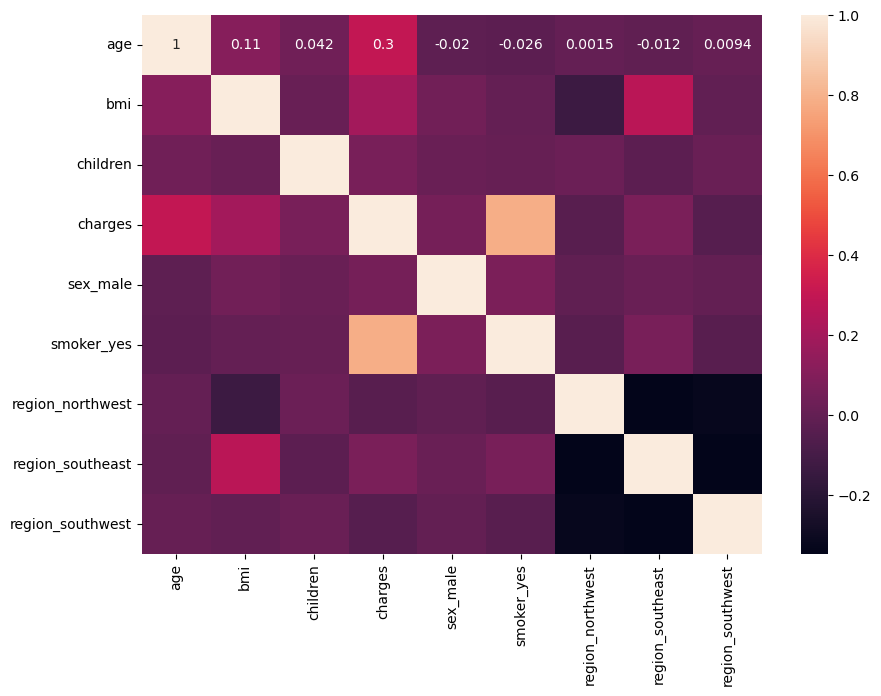

In [141]:
plt.figure(figsize=(10,7))
sns.heatmap(df_dummy.corr(), annot=True)

#### observations:
regions are  correlated with each other, so we have Multicollinearity.

charges is highly correlated with smoker_yes.

### Linear Regression ML

###### Labeled the data

In [142]:
x = pd.DataFrame(df_dummy, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])

y = df_dummy["charges"]

In [146]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [148]:
scaler = StandardScaler()
scaler.fit(x_train)  
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [149]:
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

LinearRegression()

In [150]:
linear_intercept = reg.intercept_
linear_coef = reg.coef_

In [151]:
for f,c in zip(x_train, linear_coef):
    print("coef of column ", f, " is : ", c)

coef of column  age  is :  3408.7248380484602
coef of column  bmi  is :  1807.9164317498144
coef of column  children  is :  575.5610514108258
coef of column  sex_male  is :  -41.4709516100998
coef of column  smoker_yes  is :  9466.141539431695
coef of column  region_northwest  is :  -242.0680351293697
coef of column  region_southeast  is :  -360.1155744523403
coef of column  region_southwest  is :  -548.3351596573626


In [152]:
y_pred = reg.predict(scaled_x_test)

In [154]:
#metrics
from sklearn import metrics

In [155]:
linear_score = metrics.r2_score(y_test, y_pred)

In [156]:
def Evaluation(x_test, y_test, model) :
    y_pred = model.predict(x_test)    
    mse = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2_score)

In [157]:
Evaluation(scaled_x_test, y_test, reg)

mean_absolute_error :  4240.869937991886
mean_squared_error  :  38832590.88652548
root_mean_absolute_error 6231.580127586059
R2_score            :  0.762868241776973


In [158]:
def compare(y_test, y_pred):
    compare = pd.DataFrame()
    compare["Actual"] = y_test
    compare["Predict"] = y_pred
    compare["compare"] = abs(y_test-y_pred)
    return compare

In [159]:
compare(y_test,y_pred)

,Actual,Predict,compare
1248,1633.96180,5166.958334,3532.996534
610,8547.69130,9601.121191,1053.429891
393,9290.13950,11400.879099,2110.739599
503,32548.34050,26117.898110,6430.442390
198,9644.25250,7001.185205,2643.067295
...,...,...,...
1320,5425.02335,7318.981256,1893.957906
97,10226.28420,13622.701899,3396.417699
786,12741.16745,15258.212374,2517.044924
1181,2850.68375,3946.527741,1095.843991
